In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# rujukan dataset : https://www.kaggle.com/aturner374/eighty-years-of-canadian-climate-data
data = pd.read_csv('Canadian_climate_history.csv')

In [3]:
# memenuhi kriteria point 1: Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
data.tail()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,MEAN_TEMPERATURE_OTTAWA,TOTAL_PRECIPITATION_OTTAWA,MEAN_TEMPERATURE_QUEBEC,TOTAL_PRECIPITATION_QUEBEC,MEAN_TEMPERATURE_SASKATOON,TOTAL_PRECIPITATION_SASKATOON,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
29216,28-Dec-2019 00:00:00,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,NaN,1.3,0.0,-0.5,0.0,-0.5,0.3,-15.3,NaN,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,NaN,-4.7,0.0
29217,29-Dec-2019 00:00:00,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,0.0,-3.4,0.8,-4.9,0.0,-15.6,NaN,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7
29218,30-Dec-2019 00:00:00,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,13.4,-2.7,12.7,-5.7,2.7,-15.0,NaN,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1
29219,31-Dec-2019 00:00:00,4.3,0.0,-2.6,0.0,0.0,11.4,-1.0,NaN,-0.2,11.4,-0.7,6.6,-3.5,8.2,-8.2,NaN,-1.2,0.0,0.4,2.0,8.4,21.2,-1.1,NaN,-12.3,0.0
29220,01-Jan-2020 00:00:00,-0.3,0.0,-4.0,0.0,1.8,0.4,0.2,NaN,0.2,0.9,-0.5,0.0,-2.8,1.5,-7.9,NaN,-0.4,6.4,-1.7,0.0,7.8,0.8,-4.2,NaN,-7.0,0.0


In [4]:
data.isnull().sum()

LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECIPITATION_WHITEHORSE    4095
MEAN_TEMPERATURE_WINNIPEG

In [5]:
data = data.dropna()

In [6]:
dates = data['LOCAL_DATE'].values
temp = data['MEAN_TEMPERATURE_TORONTO'].values

In [7]:
from sklearn.model_selection import train_test_split
# Memenuhi kriteria point 3: Validation set sebesar 20% dari total dataset.
train_date, test_date, temp_train, temp_test = train_test_split(dates, temp, test_size=.2)

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [9]:
train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
# memenuhi kriteria point 4: Model harus menggunakan model sequential.
model = tf.keras.models.Sequential([
    # memenuhi kriteria point 2: Harus menggunakan LSTM dalam arsitektur model.
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
# memenuhi kriteria point 5: Harus menggunakan Learning Rate pada Optimizer.
optimizer = tf.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(train_set, epochs=100)

Epoch 1/100
134/134 [==============================] - 15s 110ms/step - loss: 10.3207 - mae: 10.8109
Epoch 2/100
134/134 [==============================] - 15s 110ms/step - loss: 10.1961 - mae: 10.6862
Epoch 3/100
134/134 [==============================] - 15s 110ms/step - loss: 10.0381 - mae: 10.5282
Epoch 4/100
134/134 [==============================] - 20s 150ms/step - loss: 9.8265 - mae: 10.3163
Epoch 5/100
134/134 [==============================] - 16s 118ms/step - loss: 9.5460 - mae: 10.0357
Epoch 6/100
134/134 [==============================] - 15s 111ms/step - loss: 9.2101 - mae: 9.6999
Epoch 7/100
134/134 [==============================] - 19s 142ms/step - loss: 8.9044 - mae: 9.3947
Epoch 8/100
134/134 [==============================] - 15s 116ms/step - loss: 8.7140 - mae: 9.2042
Epoch 9/100
134/134 [==============================] - 15s 111ms/step - loss: 8.6436 - mae: 9.1342
Epoch 10/100
134/134 [==============================] - 15s 110ms/step - loss: 8.6248 - mae: 9.1155
E

Text(0.5, 1.0, 'Error training')

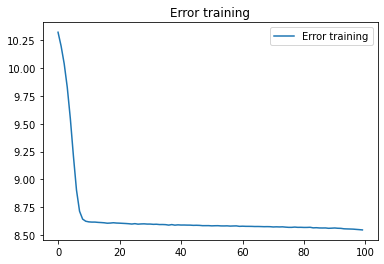

In [14]:
loss = history.history['loss']

epochs = 100
jarak_epochs = range(epochs)

plt.plot(jarak_epochs, loss, label='Error training')
plt.legend(loc='upper right')
plt.title('Error training')